In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import os

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
data = pd.read_csv('final_dataset_0.csv')

In [3]:
data['article_id'] = data['article_id'].apply(lambda x: '0' + str(x))

In [4]:
# Load the pre-trained ResNet50 model + higher level layers
base_model = ResNet50(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)

In [5]:
# Function to preprocess and extract features from an image
def extract_features(img_path, model=model, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

In [7]:
## load the image embeddings
image_features_pca = np.load('image_features.npz')['arr_0']

In [8]:
## load the image_path from the local folder
with open('image_paths.pkl', 'rb') as f:
    image_paths = pickle.load(f)

In [10]:
len(image_features_pca), len(image_paths)

(9961, 9961)

In [11]:
## load the pca model
with open('pca.pkl', 'rb') as f:
    pca = pickle.load(f)

In [12]:
def display_image(id):
    img = Image.open(f'{id}')
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [18]:
# Function to find top N similar images
def find_similar_images(query_image_path, image_features, top_n=5):
    query_features = extract_features(query_image_path, model)
    query_features_pca = pca.transform([query_features])
    similarities = cosine_similarity(query_features_pca, image_features).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    return [image_paths[i] for i in top_indices]

1/1 [==============================] - 0s 134ms/step
Top similar images: ['Images/0386859030.jpg', 'Images/0440144001.jpg', 'Images/0445419005.jpg', 'Images/0525815002.jpg', 'Images/0593829029.jpg', 'Images/0620316003.jpg', 'Images/0591466004.jpg', 'Images/0525825002.jpg', 'Images/0449123052.jpg', 'Images/0711053001.jpg']


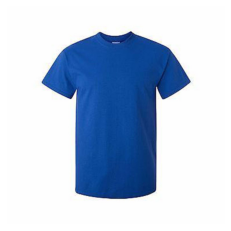

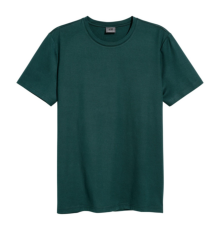

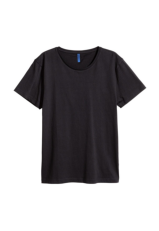

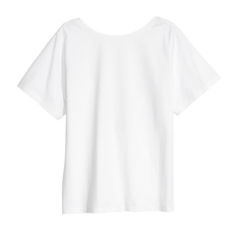

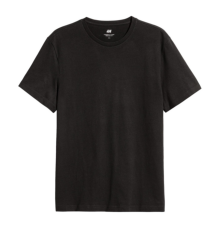

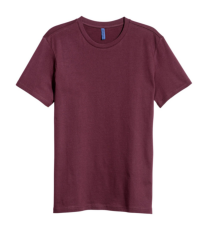

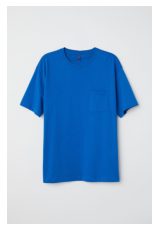

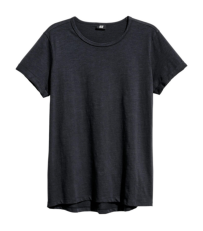

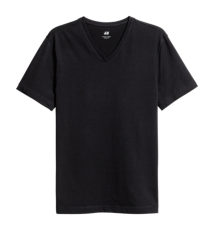

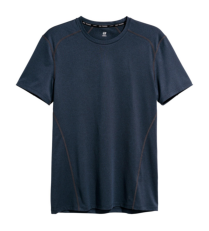

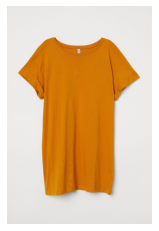

In [25]:
query_image = 'test.jpg'
top_similar_images = find_similar_images(query_image, image_features_pca, top_n=10)
print("Top similar images:", top_similar_images)
## display the top similar images
## display test image
display_image('test.jpg')
for img_path in top_similar_images:
    display_image(img_path)

In [20]:
ids = []

In [21]:
for i in range(0, len(top_similar_images)):
    x = top_similar_images[i].split('/')[1].split('.')[0]
    ids.append(x)

In [22]:
## display the dataframe where article id is present in ids
data[data['article_id'].isin(ids)]

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc,embeddings,combined_features,season,price
54,0270375006,270375,Sandra squared,81,Sunglasses,Accessories,1010010,Melange,12,Light Beige,...,Ladieswear,66,Womens Small accessories,1019,Accessories,Sunglasses with plastic frames and UV-protecti...,[-3.38491686e-02 6.81340136e-03 8.45718235e-...,Sandra squared Sunglasses Accessories Melange ...,summer,5099
3571,0656597001,656597,PQ Nancy sunglasses,81,Sunglasses,Accessories,1010016,Solid,9,Black,...,Ladieswear,66,Womens Small accessories,1019,Accessories,"Sunglasses with plastic frames, sidepieces and...",[-5.01095466e-02 -1.94861442e-02 -9.18317121e-...,PQ Nancy sunglasses Sunglasses Accessories Sol...,summer,8449
3596,0657287001,657287,Dawn padded Tshirt,306,Bra,Underwear,1010016,Solid,9,Black,...,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","T-shirt bra in jersey with underwired, moulded...",[-2.33356394e-02 3.76252234e-02 9.58416611e-...,Dawn padded Tshirt Bra Underwear Solid Black D...,season neutral,2149
4674,0694848016,694848,Ellen 2pk ct rio wireless,306,Bra,Underwear,1010016,Solid,17,Yellowish Brown,...,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",Non-wired bras in soft cotton jersey with padd...,[-1.10684093e-02 4.12650825e-03 3.64050232e-...,Ellen 2pk ct rio wireless Bra Underwear Solid ...,season neutral,2349
5901,0734877001,734877,Nadia sandalette,92,Heeled sandals,Shoes,1010016,Solid,9,Black,...,Ladieswear,64,Womens Shoes,1020,Shoes,Imitation suede sandals with covered block hee...,[-9.57011655e-02 -7.57751428e-03 3.84611897e-...,Nadia sandalette Heeled sandals Shoes Solid Bl...,summer,3999
6719,0761493002,761493,Andrea sunglasses,81,Sunglasses,Accessories,1010017,Stripe,9,Black,...,Baby/Children,44,Baby Essentials & Complements,1019,Accessories,Sunglasses with plastic frames and UV-protecti...,[-8.99376869e-02 5.92694767e-02 4.06839401e-...,Andrea sunglasses Sunglasses Accessories Strip...,summer,4349
7461,0794884001,794884,Anastasia sunglasses,81,Sunglasses,Accessories,1010010,Melange,17,Yellowish Brown,...,Ladieswear,66,Womens Small accessories,1019,Accessories,Sunglasses with sturdy plastic frames and UV-p...,[-1.45901768e-02 -2.48028599e-02 2.56897043e-...,Anastasia sunglasses Sunglasses Accessories Me...,summer,3349
8664,0848308006,848308,Hermione sunglasses,81,Sunglasses,Accessories,1010016,Solid,9,Black,...,Ladieswear,66,Womens Small accessories,1019,Accessories,"Sunglasses with plastic frames and tinted, UV-...",[-6.39428496e-02 -5.22120446e-02 -5.41088171e-...,Hermione sunglasses Sunglasses Accessories Sol...,summer,7449
9360,0882993001,882993,Hilma sunglasses,81,Sunglasses,Accessories,1010010,Melange,9,Black,...,Ladieswear,66,Womens Small accessories,1019,Accessories,"Sunglasses with plastic frames and tinted, UV-...",[-2.34089699e-02 3.63461161e-03 -5.50367776e-...,Hilma sunglasses Sunglasses Accessories Melang...,summer,1299
9361,0882995001,882995,Erin square sunglasses,81,Sunglasses,Accessories,1010019,Transparent,13,Beige,...,Ladieswear,66,Womens Small accessories,1019,Accessories,Rectangular sunglasses with plastic frames and...,[-2.36916021e-02 -4.44396064e-02 3.60291749e-...,Erin square sunglasses Sunglasses Accessories ...,summer,1349
